# 🎓 Student Performance Analysis & Prediction

This project analyzes a student performance dataset and builds a simple machine learning model to predict whether a student has high or low performance based on their scores and other features.

We'll go through:
- Data exploration
- Visualization
- Feature engineering
- Basic classification model


In [21]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset
df = pd.read_csv('student_performance.csv')

# Step 3: Show first 5 rows
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 📄 Dataset Overview

Let's explore the shape, column names, and check for missing values.


In [6]:
print("Shape of dataset:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
df.describe()


Shape of dataset: (10, 8)

Column Names:
 ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Data types:
 gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object


,math score,reading score,writing score
count,10.000000,10.00000,10.000000
mean,65.500000,73.70000,70.000000
std,18.416478,17.58819,19.686431
min,38.000000,43.00000,39.000000
25%,51.250000,61.00000,54.250000
50%,70.000000,75.00000,74.500000
75%,75.000000,88.25000,85.500000
max,90.000000,95.00000,93.000000


## 🛠 Feature Engineering

We’ll create a new feature: `average_score`, which is the mean of math, reading, and writing scores.


In [9]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


## 📊 Data Visualizations

Let’s visualize score distributions and relationships.


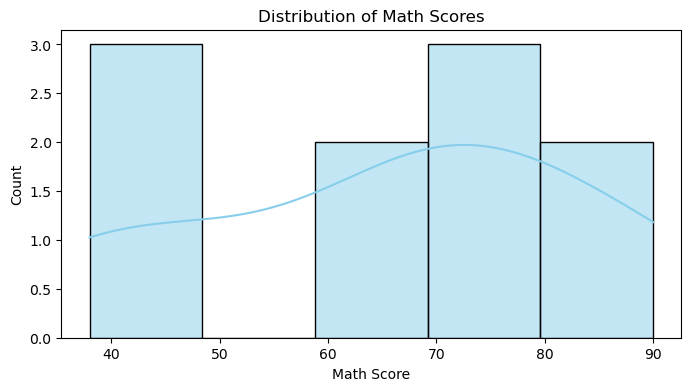

In [12]:
plt.figure(figsize=(8, 4))
sns.histplot(df['math score'], kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Count')
plt.show()


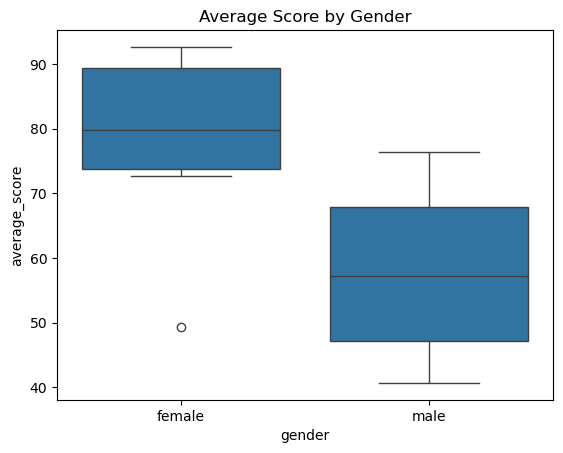

In [14]:
sns.boxplot(x='gender', y='average_score', data=df)
plt.title('Average Score by Gender')
plt.show()


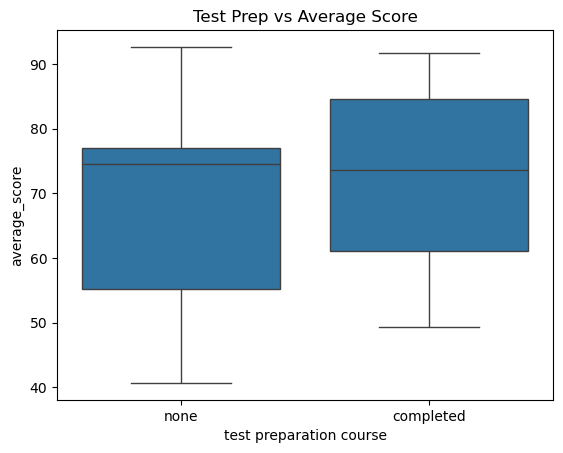

In [16]:
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title('Test Prep vs Average Score')
plt.show()


## 🤖 Machine Learning Model

We’ll predict whether a student passes (average score >= 60) using logistic regression.


In [26]:
# Create 'average_score' column if not already done
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)


In [28]:
# Create binary pass/fail column
df['pass'] = df['average_score'].apply(lambda x: 1 if x >= 60 else 0)
df['pass'].value_counts()


pass
1    7
0    3
Name: count, dtype: int64

## 🧼 Preprocessing

We'll convert categorical variables to numeric using one-hot encoding and split the data.


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Features and target
X = df_encoded.drop(['average_score', 'pass'], axis=1)
y = df_encoded['pass']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 🚀 Model Training & Evaluation


In [33]:
# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



## 🤖 Training a Logistic Regression Model

We'll use the cleaned and encoded dataset to train a logistic regression model to predict if a student passes.


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# One-hot encode categorical columns (turn strings into numbers)
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop(['average_score', 'pass'], axis=1)
y = df_encoded['pass']

# Split into training and testing data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Initialize the model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


In [44]:
# Evaluate model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Show precision, recall, f1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

